In [88]:
#########################
# CODE WITH MANUAL IMPLEMENTATION OF FLD(Code From Scratch)
# Classification Type : Fischer Linear Discriminant Analysis (FLD)
# DATASET :"Breast Cancer Diganosis(bdiag.csv)"
#########################

In [89]:
#########################
# Importing Basic Libraries
#########################
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math

In [90]:
#########################
# Loading dataset
#########################
df = pd.read_csv("E:/Codes/Jupyter/Datasets/bdiag.csv")
df = df.drop(['id'], axis = 1)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

for i in range(1,30):
    array_1d = df.iloc[:,[i]].values
    range_to_normalize = (0,1)
    normalized_array_1d = normalize(array_1d, range_to_normalize[0], range_to_normalize[1])
    df.iloc[:,[i]]= normalized_array_1d


In [92]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.11890
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.08902
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.08758
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.17300
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.07115
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.06637
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.07820
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.12400


In [93]:
#########################
# Allocating data Columns to variables
#########################
from sklearn.preprocessing import LabelEncoder

X = df.loc[ : , df.columns != 'diagnosis'].values
y = df['diagnosis'].values

#########################
# Assigning Numeric Values to Object Data
#########################
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
X

array([[0.521 , 0.0227, 0.546 , ..., 0.912 , 0.5985, 0.1189],
       [0.6431, 0.2726, 0.6158, ..., 0.6392, 0.2336, 0.089 ],
       [0.6015, 0.3903, 0.5957, ..., 0.8351, 0.4037, 0.0876],
       ...,
       [0.4553, 0.6212, 0.4458, ..., 0.4873, 0.1287, 0.0782],
       [0.6446, 0.6635, 0.6655, ..., 0.9107, 0.4971, 0.124 ],
       [0.0369, 0.5015, 0.0285, ..., 0.    , 0.2574, 0.0704]])

In [95]:
#########################
# Creating Dictionary for Histograms
#########################

label_dict = {1: 'Benign B', 2: 'Malignant M'}


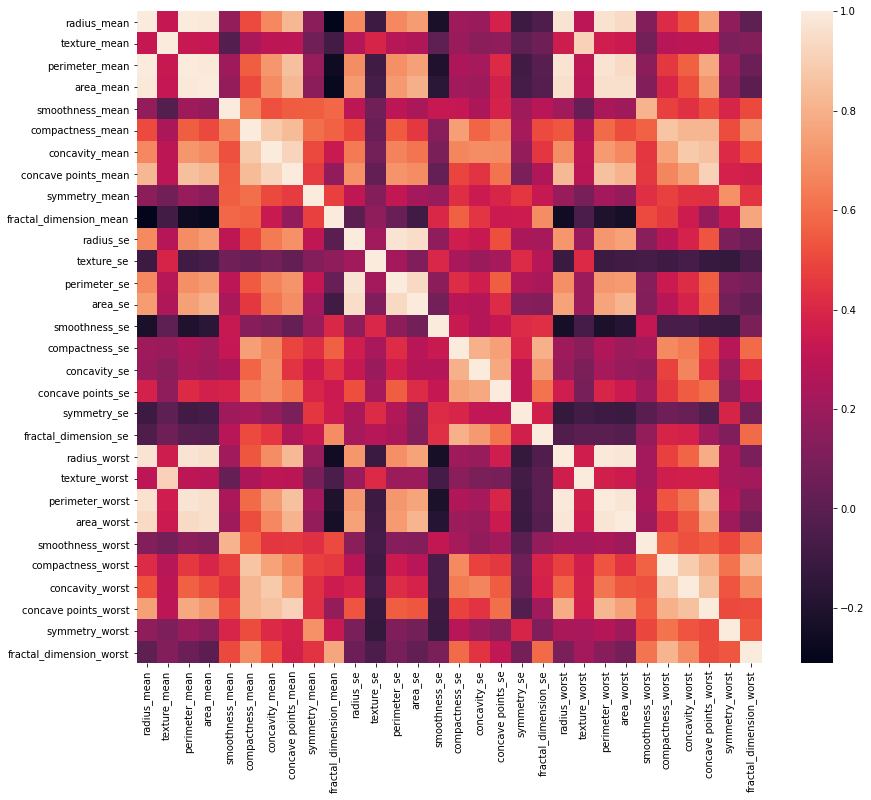

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 12))
sb.heatmap(df.corr())
plt.show()

In [97]:
#########################
# Creating Vectors based on the data
#########################
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [0.2445 0.2775 0.2369 0.1354 0.3597 0.1862 0.1079 0.1278 0.3444 0.2718
 0.0625 0.1901 0.0586 0.0268 0.1864 0.1441 0.0656 0.1867 0.1787 0.0947
 0.1939 0.3064 0.1823 0.0918 0.3552 0.1508 0.1328 0.2558 0.2242 0.0794]

Mean Vector class 2: [0.4961 0.4023 0.4946 0.3541 0.4538 0.3859 0.3767 0.4373 0.4389 0.2679
 0.1802 0.188  0.1681 0.123  0.1723 0.2255 0.1056 0.2853 0.1772 0.1094
 0.4698 0.461  0.453  0.304  0.4865 0.3372 0.3599 0.6262 0.3291 0.0915]



In [98]:
#########################
# Creating Matrix from the above st of vecotors
#########################
S_W = np.zeros((30,30))
for cl,mv in zip(range(1,30), mean_vectors):
    class_sc_mat = np.zeros((30,30))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(30,1), mv.reshape(30,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 7.3798  0.285   7.2492  6.6434 -1.0967  1.084   2.9799  4.6695 -1.2268
  -4.258   2.5217 -1.054   2.4203  2.7016 -1.6793 -0.1006  0.0648  0.8669
  -1.0971 -0.8623  6.5596 -0.5671  6.24    5.3738 -2.6863 -0.2601  0.7163
   3.5285 -1.6169 -0.3925]
 [ 0.285   9.9454  0.2941  0.3296 -1.8069 -0.1468  0.2052 -0.4617 -0.7529
  -0.8736  0.3352  3.9263  0.3996  0.2262  0.2904  0.7814  0.239  -0.0537
   0.1137  0.1668  0.429   9.776   0.4561  0.4494 -1.2143  0.4093  0.374
  -0.6375 -0.6834 -0.0228]
 [ 7.2492  0.2941  7.1826  6.5489 -0.7145  1.7602  3.545   5.0443 -0.8242
  -3.5732  2.5917 -0.9371  2.5453  2.7378 -1.4887  0.4253  0.2883  1.1615
  -0.8518 -0.553   6.4424 -0.5667  6.2084  5.2929 -2.3361  0.2457  1.1765
   3.9191 -1.3962 -0.3264]
 [ 6.6434  0.3296  6.5489  6.2947 -0.8309  1.0379  3.0451  4.4586 -0.9747
  -3.4547  2.8138 -0.6243  2.6844  2.9638 -1.0321  0.0553  0.1795  0.8228
  -0.6694 -0.5826  6.01   -0.5062  5.7332  5.2079 -2.2409 -0.3701  0.6351
  

In [99]:
#########################
# Calculating mean and Subtracting from each element
#########################
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((30,30))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(30,1) # make column vector
    overall_mean = overall_mean.reshape(30,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 8.4208e+00  4.1765e+00  8.6242e+00  7.3193e+00  3.1485e+00  6.6831e+00
   8.9955e+00  1.0358e+01  3.1647e+00 -1.3202e-01  3.9388e+00 -7.0011e-02
   3.6642e+00  3.2216e+00 -4.7306e-01  2.7254e+00  1.3376e+00  3.2985e+00
  -5.2463e-02  4.9297e-01  9.2330e+00  5.1763e+00  9.0614e+00  7.1017e+00
   4.3949e+00  6.2392e+00  7.6015e+00  1.2397e+01  3.5111e+00  4.0455e-01]
 [ 4.1765e+00  2.0715e+00  4.2774e+00  3.6302e+00  1.5616e+00  3.3147e+00
   4.4616e+00  5.1375e+00  1.5696e+00 -6.5481e-02  1.9535e+00 -3.4724e-02
   1.8174e+00  1.5978e+00 -2.3463e-01  1.3517e+00  6.6343e-01  1.6360e+00
  -2.6021e-02  2.4450e-01  4.5794e+00  2.5673e+00  4.4942e+00  3.5223e+00
   2.1798e+00  3.0945e+00  3.7702e+00  6.1487e+00  1.7414e+00  2.0065e-01]
 [ 8.6242e+00  4.2774e+00  8.8324e+00  7.4961e+00  3.2245e+00  6.8445e+00
   9.2127e+00  1.0609e+01  3.2411e+00 -1.3521e-01  4.0339e+00 -7.1702e-02
   3.7527e+00  3.2994e+00 -4.8448e-01  2.7912e+00  1.3699e+00  3.3781e+00
  -5.

In [100]:
#########################
# Calculating Eigenvalues of the Vectors
#########################
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(30,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 4.4548e-01]
 [-1.3013e-02]
 [-3.3260e-01]
 [-7.2543e-02]
 [-9.0823e-04]
 [ 1.3326e-01]
 [-5.7766e-02]
 [-4.1721e-02]
 [-1.9689e-03]
 [-1.5290e-04]
 [-1.1629e-01]
 [ 2.9607e-03]
 [ 4.6273e-02]
 [ 4.7855e-02]
 [-4.5153e-02]
 [-8.3666e-04]
 [ 1.3670e-01]
 [-5.4012e-02]
 [-1.1679e-02]
 [ 2.0027e-02]
 [-5.3119e-01]
 [-2.6007e-02]
 [ 4.7336e-02]
 [ 3.9834e-01]
 [-7.9587e-03]
 [-6.7016e-03]
 [-4.6205e-02]
 [-1.3081e-02]
 [-2.7346e-02]
 [-4.1664e-01]]
Eigenvalue 1: 3.43e+00

Eigenvector 2: 
[[-5.8658e-01]
 [-2.6066e-03]
 [ 7.6231e-01]
 [-8.6622e-02]
 [ 7.3953e-03]
 [-6.3767e-03]
 [-5.8562e-02]
 [-1.1179e-02]
 [-9.6248e-04]
 [ 5.9445e-03]
 [ 5.6848e-02]
 [ 1.5031e-03]
 [-5.9470e-02]
 [-2.2509e-02]
 [-8.8910e-03]
 [ 1.8442e-03]
 [ 6.8088e-02]
 [-1.2652e-02]
 [-7.4697e-03]
 [-4.8270e-03]
 [-1.3697e-01]
 [-4.1559e-03]
 [-2.8151e-02]
 [ 1.7087e-01]
 [-7.3692e-04]
 [ 1.4891e-02]
 [-6.7003e-03]
 [ 5.9499e-04]
 [-3.6785e-03]
 [-4.8293e-02]]
Eigenvalue 2: 4.60e-13

Eigenvector 3: 
[

In [101]:
#########################
# Creating Assertion for array
#########################
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(30,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [102]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

3.4311441710753523
4.599744129026758e-13
2.1456753476275606e-13
7.753411242492858e-14
7.753411242492858e-14
6.096396084256276e-14
4.12177637392317e-14
2.3004649204389347e-14
2.3004649204389347e-14
1.8832290522657216e-14
1.4688385026427852e-14
8.08805526287731e-15
8.08805526287731e-15
7.328294021315459e-15
7.328294021315459e-15
4.162125600956477e-15
4.162125600956477e-15
4.14083745816166e-15
2.8278169866025157e-15
2.8278169866025157e-15
2.7715330487893057e-15
2.7715330487893057e-15
1.180586469464016e-15
7.701088840430553e-16
6.888176688852427e-16
6.888176688852427e-16
4.547908793817271e-16
2.0909055653188442e-16
4.5573771523506555e-17
1.2640851156076697e-17


In [103]:
#########################
# Calculating Variances in the above obtained Eigenvalues
#########################
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%
eigenvalue 21: 0.00%
eigenvalue 22: 0.00%
eigenvalue 23: 0.00%
eigenvalue 24: 0.00%
eigenvalue 25: 0.00%
eigenvalue 26: 0.00%
eigenvalue 27: 0.00%
eigenvalue 28: 0.00%
eigenvalue 29: 0.00%
eigenvalue 30: 0.00%


In [104]:
#########################
# Making matrix from the obtained Variance in Eigenvectors
#########################
W = np.hstack((eig_pairs[0][1].reshape(30,1), eig_pairs[1][1].reshape(30,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 4.4548e-01 -5.8658e-01]
 [-1.3013e-02 -2.6066e-03]
 [-3.3260e-01  7.6231e-01]
 [-7.2543e-02 -8.6622e-02]
 [-9.0823e-04  7.3953e-03]
 [ 1.3326e-01 -6.3767e-03]
 [-5.7766e-02 -5.8562e-02]
 [-4.1721e-02 -1.1179e-02]
 [-1.9689e-03 -9.6248e-04]
 [-1.5290e-04  5.9445e-03]
 [-1.1629e-01  5.6848e-02]
 [ 2.9607e-03  1.5031e-03]
 [ 4.6273e-02 -5.9470e-02]
 [ 4.7855e-02 -2.2509e-02]
 [-4.5153e-02 -8.8910e-03]
 [-8.3666e-04  1.8442e-03]
 [ 1.3670e-01  6.8088e-02]
 [-5.4012e-02 -1.2652e-02]
 [-1.1679e-02 -7.4697e-03]
 [ 2.0027e-02 -4.8270e-03]
 [-5.3119e-01 -1.3697e-01]
 [-2.6007e-02 -4.1559e-03]
 [ 4.7336e-02 -2.8151e-02]
 [ 3.9834e-01  1.7087e-01]
 [-7.9587e-03 -7.3692e-04]
 [-6.7016e-03  1.4891e-02]
 [-4.6205e-02 -6.7003e-03]
 [-1.3081e-02  5.9499e-04]
 [-2.7346e-02 -3.6785e-03]
 [-4.1664e-01 -4.8293e-02]]


In [105]:
X_lda = X.dot(W)
assert X_lda.shape == (569,2), "The matrix is not 150x2 dimensional."

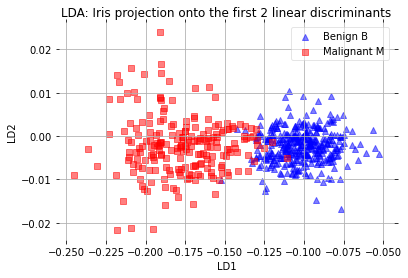

In [106]:
#########################
# Scatter Ploting the Data
#########################
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()